In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
from glob import glob

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

import settings as conf
# from utils import is_number, chunker
# import metadata

In [3]:
fig4_dir = os.path.join(conf.FIGURES_DIR, 'fig4')
os.makedirs(fig4_dir, exist_ok=True)

In [23]:
fig5_dir = os.path.join(conf.FIGURES_DIR, 'fig5')
os.makedirs(fig5_dir, exist_ok=True)

# Load gene mappings

In [4]:
with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-0.pkl'), 'rb') as f:
    genes_mapping_0 = pickle.load(f)

with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-1.pkl'), 'rb') as f:
    genes_mapping_1 = pickle.load(f)

# Load S-MultiXcan results

In [5]:
spredixcan_genes_associations_filename = os.path.join(conf.GENE_ASSOC_DIR, 'smultixcan-mashr-zscores.pkl.xz')
display(spredixcan_genes_associations_filename)

spredixcan_genes_associations = pd.read_pickle(spredixcan_genes_associations_filename)

'/mnt/phenomexcan_base/gene_assoc/smultixcan-mashr-zscores.pkl.xz'

In [6]:
spredixcan_genes_associations.shape

(22515, 4091)

In [7]:
spredixcan_genes_associations.head(5)

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.169468,0.102558,0.239545,0.887758,1.313448,1.472148,0.726160,1.516367,1.299771,1.068093,...,0.813014,0.275993,0.510834,0.024717,0.430951,0.824314,0.367414,1.377624,0.738444,0.298259
ENSG00000000457,1.358856,1.846875,0.139324,0.129530,0.757757,1.103979,0.612418,1.822327,2.035372,1.008058,...,1.441795,0.654791,2.545653,1.202984,0.514244,0.237223,0.414171,0.101731,1.012735,0.945167
ENSG00000000460,0.151008,1.173202,1.179426,0.571656,0.098771,0.221072,0.276415,0.461381,0.855502,0.201876,...,0.668962,0.300040,0.541782,1.033308,0.482261,0.695624,0.336480,0.083316,3.493196,0.991948
ENSG00000000938,1.302722,0.841524,1.578926,0.721340,0.139314,4.387016,0.125959,1.247123,0.215124,0.892083,...,0.126657,0.048048,1.886356,0.540496,0.127524,1.494501,0.056432,1.704863,1.351619,1.027297
ENSG00000000971,1.338813,0.262339,0.689379,1.702019,0.325859,0.063161,1.141126,0.882682,0.035533,1.810191,...,0.858497,1.675562,2.319072,1.598721,0.162958,0.005703,3.004544,0.803669,0.444266,0.165671


# Figures path

In [8]:
# figures_path = os.path.join(conf.DELIVERABLES_DIR, 'figures')
# os.makedirs(figures_path, exist_ok=True)

# Fig. 4: white blood cells and related genes

In [9]:
from entity import Trait

In [10]:
spredixcan_genes_associations.columns[spredixcan_genes_associations.columns.str.lower().str.contains('-mean_')]

Index(['30270_raw-Mean_sphered_cell_volume',
       '30050_raw-Mean_corpuscular_haemoglobin',
       '20023_raw-Mean_time_to_correctly_identify_matches',
       '4244_raw-Mean_signaltonoise_ratio_SNR_right',
       '30260_raw-Mean_reticulocyte_volume',
       '30060_raw-Mean_corpuscular_haemoglobin_concentration',
       '30100_raw-Mean_platelet_thrombocyte_volume',
       '4233_raw-Mean_signaltonoise_ratio_SNR_left',
       '30040_raw-Mean_corpuscular_volume'],
      dtype='object')

In [11]:
_traits_plain = """
30200_raw-Neutrophill_percentage
30000_raw-White_blood_cell_leukocyte_count
30180_raw-Lymphocyte_percentage
30190_raw-Monocyte_percentage
30120_raw-Lymphocyte_count
30210_raw-Eosinophill_percentage
30150-Eosinophill_count
30220_raw-Basophill_percentage
30080_raw-Platelet_count
30040_raw-Mean_corpuscular_volume
30050_raw-Mean_corpuscular_haemoglobin
""".split()
_traits_plain[:3]

_traits_rename = {t:Trait(full_code=t).description for t in _traits_plain}

In [12]:
_genes_names = """
PSMD3
CD69
KLF2
CXCL2
CREB5
CXCL3
ZFP36L2
JAZF1
NCOR1
TET2
""".split()
_genes_ids = [genes_mapping_1[g] for g in _genes_names]
display(_genes_ids[:3])

['ENSG00000108344', 'ENSG00000110848', 'ENSG00000127528']

In [13]:
submatrix = spredixcan_genes_associations.T.loc[_traits_plain, _genes_ids].rename(index=_traits_rename).rename(columns=genes_mapping_0)

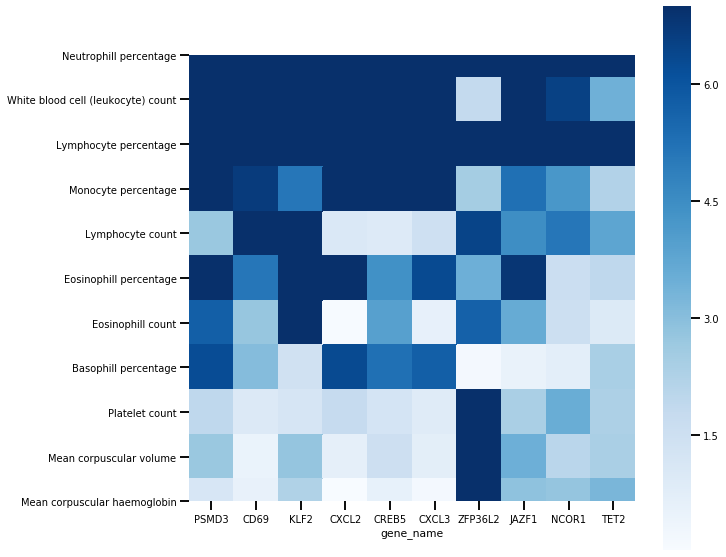

In [14]:
with sns.plotting_context('talk', font_scale=0.6):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(data=submatrix, yticklabels=True, xticklabels=True, cmap='Blues', square=True, cbar=True, ax=ax, vmax=7)

plt.savefig(os.path.join(fig4_dir, 'fig4.pdf'), bbox_inches='tight')

In [15]:
submatrix

gene_name,PSMD3,CD69,KLF2,CXCL2,CREB5,CXCL3,ZFP36L2,JAZF1,NCOR1,TET2
Neutrophill percentage,34.650399,17.414101,12.223870,21.617789,19.063630,19.993367,16.569096,14.706284,14.476377,12.843880
White blood cell (leukocyte) count,34.319629,7.758219,8.714246,18.694454,17.380264,17.630954,1.823762,7.581537,6.542425,3.462360
Lymphocyte percentage,31.348547,23.862637,18.416347,18.081044,17.758175,17.240523,17.182078,15.325512,14.569065,14.481956
Monocyte percentage,19.590249,6.675607,5.095126,11.324904,9.128680,9.852187,2.499215,5.279623,4.225018,2.225436
Lymphocyte count,2.705247,14.576822,12.287163,1.064880,0.943588,1.502620,6.475947,4.474494,5.117621,3.806482
Eosinophill percentage,7.545370,5.095489,18.149725,8.140795,4.408100,6.299704,3.464225,6.827199,1.595321,1.927853
Eosinophill count,5.723127,2.761729,16.814468,0.078946,3.935110,0.622918,5.683131,3.625121,1.578582,0.960452
Basophill percentage,6.238854,3.059005,1.423416,6.292703,5.262133,5.722642,0.186544,0.546985,0.720576,2.406242
Platelet count,1.918273,1.009871,1.210596,1.787635,1.272890,0.897328,15.004342,2.397627,3.557222,2.343970
Mean corpuscular volume,2.700473,0.488733,2.808667,0.666545,1.556985,0.765360,9.174771,3.478653,2.028410,2.375947


# Fig 5, B: Heatmap in PhenomeXcan vs ClinVar

In [16]:
clustermap_matrix_filename = os.path.join(conf.RESULTS_DIR, 'phenomexcan_vs_clinvar-clustermap.pkl.xz')
display(clustermap_matrix_filename)

'/mnt/phenomexcan_base/results/phenomexcan_vs_clinvar-clustermap.pkl.xz'

In [17]:
clustermap_matrix = pd.read_pickle(clustermap_matrix_filename)

In [18]:
clustermap_matrix.shape

(1949, 4411)

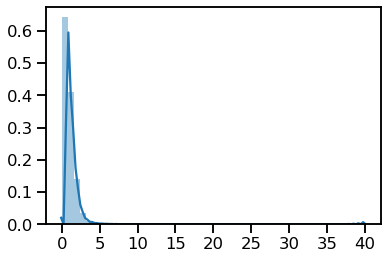

In [19]:
# plot z-score density
flat_values = clustermap_matrix.values.flatten()
flat_values = pd.Series(flat_values)

plt.figure(figsize=(6, 4))
with sns.plotting_context(context='talk'):
    sns.distplot(flat_values)

In [20]:
selected_matrix = clustermap_matrix.iloc[:300, :300]

In [21]:
t = np.array(selected_matrix.shape)
display(f'Data size: {t}')
fig_size = list(reversed(tuple((t / max(t)) * 200)))
display(fig_size)

'Data size: [300 300]'

[200.0, 200.0]

In [25]:
plt.figure(figsize=fig_size)
ax = sns.heatmap(data=selected_matrix, yticklabels=False, xticklabels=False, cmap='Blues', cbar=False)

plt.savefig(os.path.join(fig5_dir, 'fig5b.pdf'), bbox_inches='tight')

# Fig 5, C: Parkinson's disease and red blood cells

In [26]:
assoc_coef_df_filename = os.path.join(conf.GENE_ASSOC_DIR, 'smultixcan_and_clinvar-z2.pkl.xz')
display(assoc_coef_df_filename)

'/mnt/phenomexcan_base/gene_assoc/smultixcan_and_clinvar-z2.pkl.xz'

In [27]:
assoc_coef_df = pd.read_pickle(assoc_coef_df_filename)

In [28]:
assoc_coef_df.shape

(4091, 5106)

In [29]:
assoc_coef_df.index[assoc_coef_df.index.str.lower().str.contains('cell')]

Index(['20552_2-Behavioural_and_miscellaneous_addictions_A_behaviour',
       '30230-Nucleated_red_blood_cell_percentage',
       '22601_92253391-Job_coding_bar_staff_cellarman_public_house',
       'M13_GIANTCELL-Giant_cell_arteritis',
       '20001_1061-Cancer_code_selfreported_basal_cell_carcinoma',
       '20432-Ongoing_behavioural_or_miscellanous_addiction',
       '30270_raw-Mean_sphered_cell_volume',
       '22601_23113399-Job_coding_higher_education_teaching_professional_university_lecturerprofessor_including_collegeuniversity_headvice_chancellor',
       '20001_1024-Cancer_code_selfreported_liverhepatocellular_cancer',
       '20001_1034-Cancer_code_selfreported_kidneyrenal_cell_cancer',
       'C_MULTIPLE_MYELOMA_PLASMA_CELL-Multiple_myeloma_and_malignant_plasma_cell_neoplasms',
       '22601_91493353-Job_coding_sales_room_assistant_wine_merchants_cellar_man_orderstock_filler_stockstore_keeper_lorrywarehouse_loadercheckerweigher_goods_porter_customs_attendant',
       '30000_

In [30]:
_traits_plain = """
30070_raw-Red_blood_cell_erythrocyte_distribution_width
30260_raw-Mean_reticulocyte_volume
30100_raw-Mean_platelet_thrombocyte_volume
30010_raw-Red_blood_cell_erythrocyte_count
30270_raw-Mean_sphered_cell_volume
30040_raw-Mean_corpuscular_volume
""".split()
_traits_plain[:3]

_traits_rename = {t:Trait(full_code=t).description for t in _traits_plain}

In [31]:
_clinvar_traits = assoc_coef_df.columns[assoc_coef_df.columns.str.lower().str.contains('parkinson')].tolist()
display(_clinvar_traits[:3])

['Parkinson disease, late-onset',
 'Parkinson disease 9',
 'Parkinson disease 22, autosomal dominant']

In [32]:
submatrix = assoc_coef_df.loc[_traits_plain, _clinvar_traits].rename(index=_traits_rename)

In [35]:
submatrix.index.rename('PhenomeXcan traits', inplace=True)

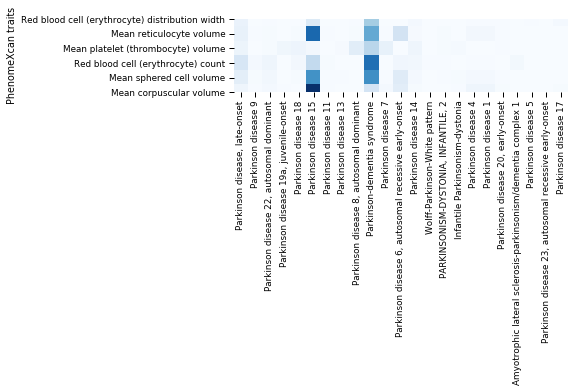

In [36]:
with sns.plotting_context('paper'):
    #fig, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(data=submatrix, yticklabels=True, xticklabels=True, square=True, cbar=False, cmap='Blues')
    
    plt.savefig(os.path.join(fig5_dir, 'fig5c.pdf'), bbox_inches='tight')

In [37]:
submatrix

,"Parkinson disease, late-onset",Parkinson disease 9,"Parkinson disease 22, autosomal dominant","Parkinson disease 19a, juvenile-onset",Parkinson disease 18,Parkinson disease 15,Parkinson disease 11,Parkinson disease 13,"Parkinson disease 8, autosomal dominant",Parkinson-dementia syndrome,...,Wolff-Parkinson-White pattern,"PARKINSONISM-DYSTONIA, INFANTILE, 2",Infantile Parkinsonism-dystonia,Parkinson disease 4,Parkinson disease 1,"Parkinson disease 20, early-onset",Amyotrophic lateral sclerosis-parkinsonism/dementia complex 1,Parkinson disease 5,"Parkinson disease 23, autosomal recessive early-onset",Parkinson disease 17
PhenomeXcan traits,,,,,,,,,,,,,,,,,,,,,
Red blood cell (erythrocyte) distribution width,35.496293,0.306735,3.462892,0.002531,1.989786,70.529971,0.117991,0.010050,2.439210,184.484166,...,0.743884,0.801888,0.320963,2.149871,2.149871,2.135851,0.764677,3.675254,0.148237,10.899567
Mean reticulocyte volume,39.948437,3.715832,6.119242,1.004961,4.498384,411.291446,2.460072,1.781738,4.657923,272.964596,...,1.008949,5.804337,0.625004,15.467896,15.467896,2.925382,0.709073,1.413552,0.014432,0.138044
Mean platelet (thrombocyte) volume,29.380691,0.919802,5.439191,20.566870,27.288363,16.074748,0.771877,6.582695,58.544110,150.437120,...,0.254310,4.169427,8.341602,0.200061,0.200061,2.391066,0.081838,0.463502,1.247531,0.748236
Red blood cell (erythrocyte) count,84.974667,10.259837,24.647549,0.607166,14.799475,136.250587,5.019697,0.002103,0.080501,395.193129,...,3.941439,2.810938,1.261901,3.904148,3.904148,0.805431,13.769513,0.059940,1.867222,0.517028
Mean sphered cell volume,54.872776,4.280215,17.755043,0.721926,4.777701,325.412881,2.969319,2.552589,1.277528,332.559807,...,0.093764,2.496773,4.941325,12.221409,12.221409,3.424310,1.403599,0.058114,0.074937,0.059492
Mean corpuscular volume,23.253483,2.484834,11.325501,2.070447,0.830791,523.930680,3.822641,0.536709,0.048091,93.985162,...,0.127066,0.490416,2.628998,23.852487,23.852487,5.074233,1.388660,1.885686,0.953584,5.124323
